In [40]:
# Importing the Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Reading the file and diisplaying the first 5 rows of the data

df = pd.read_csv("../Data/bank.csv") # Reading the data from the folder

df.head() # Displaying the first rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [42]:
# Looking at the overview of the dataset and descriptive characteristics

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [43]:
# Checking the data columns

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [44]:
# Removing the outliers from the balance column as identified from the descriptive characteristics

q1 = df["balance"].quantile(0.25)
q3 = df["balance"].quantile(0.75)

iqr = q3 - q1 # Calculating the INterquartiile range

lowerbound = q1 - 1.5 * iqr # Getting the lowerbound values
upperbound = q3 + 1.5 * iqr # Getting the upperbound values


'''
Setting the new dataframe to conatin balance columns
that fall within the lowerbound and upperbound limits
'''

df_cleaned = df[(df["balance"] >= lowerbound) & (df["balance"] <= upperbound)] 


df_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000
mean,40.897596,809.882557,15.593945,368.650836,2.517364,51.309291,0.816068
std,11.736322,997.790839,8.441658,346.480771,2.707008,109.635799,2.243602
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,94.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,443.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1228.000000,22.000000,489.500000,3.000000,2.000000,1.000000
max,95.000000,4087.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


In [45]:
# Dropping the coolumns not relevant for analysis

columns_to_drop = ["day","month","duration","pdays","previous","poutcome","campaign","contact"] # Columns to drop

df_cleaned.drop(columns=columns_to_drop,inplace=True) # Dropping the columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_40244\3537906839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=columns_to_drop,inplace=True) # Dropping the columns


In [46]:
# Checking null Values

df_cleaned.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

In [47]:
# Checking additional info and datatype

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10107 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10107 non-null  int64 
 1   job        10107 non-null  object
 2   marital    10107 non-null  object
 3   education  10107 non-null  object
 4   default    10107 non-null  object
 5   balance    10107 non-null  int64 
 6   housing    10107 non-null  object
 7   loan       10107 non-null  object
 8   deposit    10107 non-null  object
dtypes: int64(2), object(7)
memory usage: 789.6+ KB


In [48]:
# Getting the first rows of the cleaned dataset

df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,no,2343,yes,no,yes
1,56,admin.,married,secondary,no,45,no,no,yes
2,41,technician,married,secondary,no,1270,yes,no,yes
3,55,services,married,secondary,no,2476,yes,no,yes
4,54,admin.,married,tertiary,no,184,no,no,yes


# Exploratory Data Analysis

Looking at th dataset to identify trends or patterns that may aid analysis or hypothesis

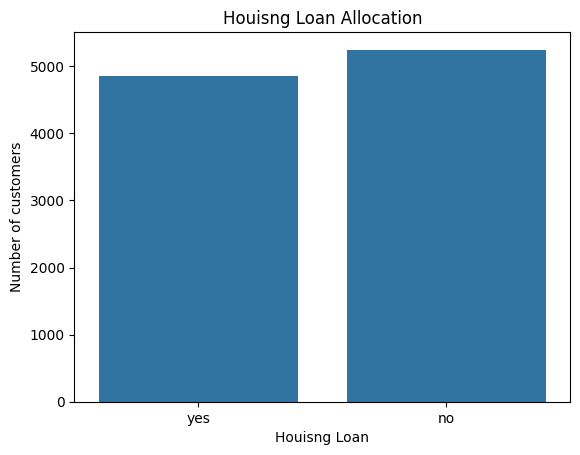

In [49]:
# Looking at the Bank customers that has housing mortgage in the dataset

sns.countplot(data=df_cleaned,x="housing")
plt.title("Houisng Loan Allocation")
plt.xlabel("Houisng Loan")
plt.ylabel("Number of customers")
plt.show()

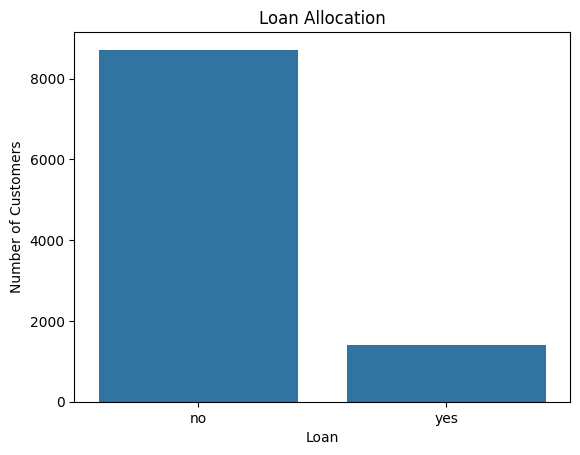

In [50]:
# Looking at customers that wiwth existing loan in the dataset

sns.countplot(data=df_cleaned,x="loan")
plt.title("Loan Allocation")
plt.xlabel("Loan")
plt.ylabel("Number of Customers")
plt.show()

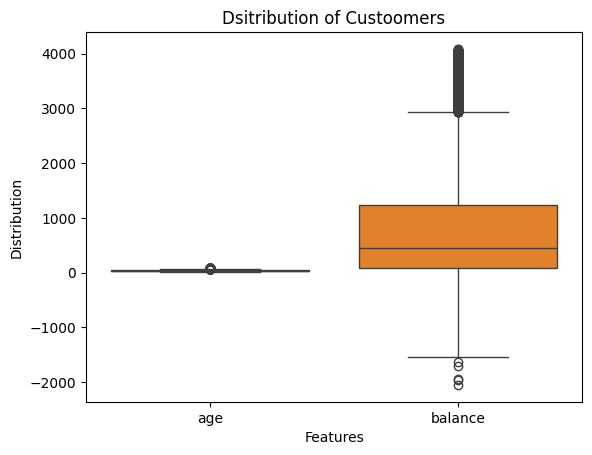

In [51]:
# Looking at distribution of customers  based on their age and balance

sns.boxplot(df_cleaned)
plt.title("Dsitribution of Custoomers")
plt.xlabel("Features")
plt.ylabel("Distribution")
plt.show()

In [52]:
# Grouping customers balances based on their job types

job_health = df_cleaned.groupby("job")["balance"].sum().sort_values(ascending=False)

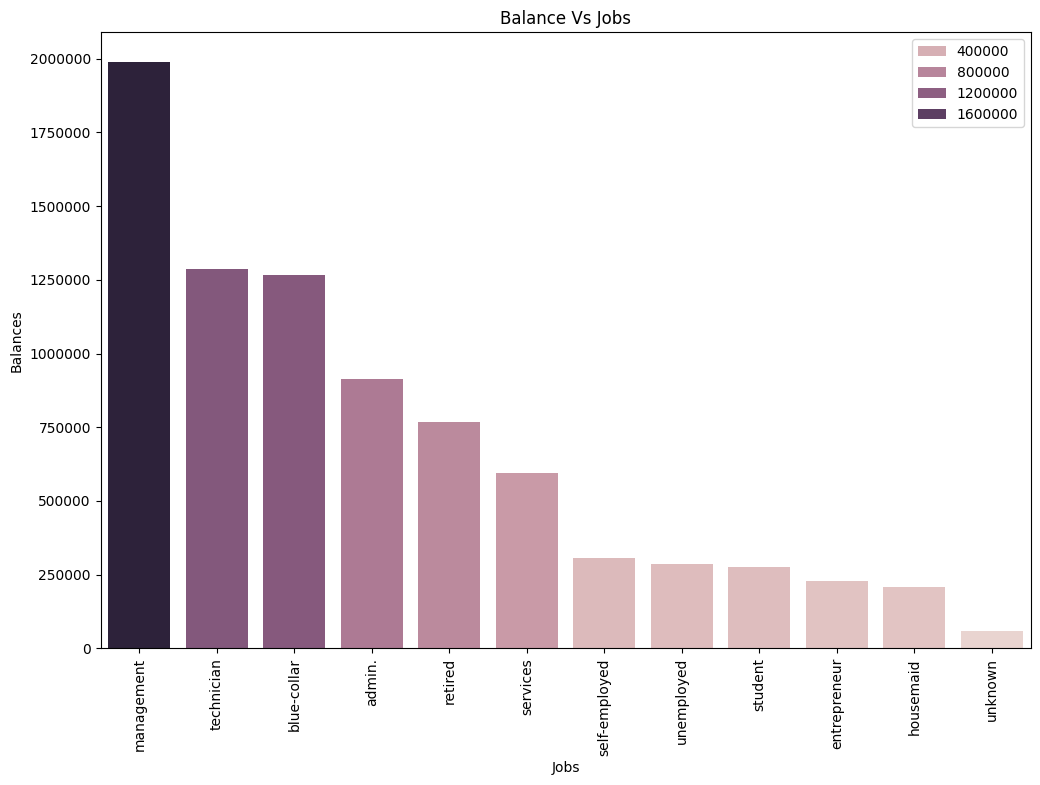

In [53]:
# Plotting the visual to see customers jobs based on their balance

plt.figure(figsize=(12,8))
sns.barplot(x=job_health.index,y=job_health.values,hue=job_health.values)
plt.xlabel("Jobs")
plt.ylabel("Balances")
plt.title("Balance Vs Jobs")
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain",axis="y")
plt.show()

In [54]:
# Grouping customer balances based on their education Levels

education_health = df_cleaned.groupby("education")["balance"].sum().sort_values(ascending=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_40244\3854986172.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.barplot(x=education_health.index,y=education_health.values,hue=education_health.values,color="orange")


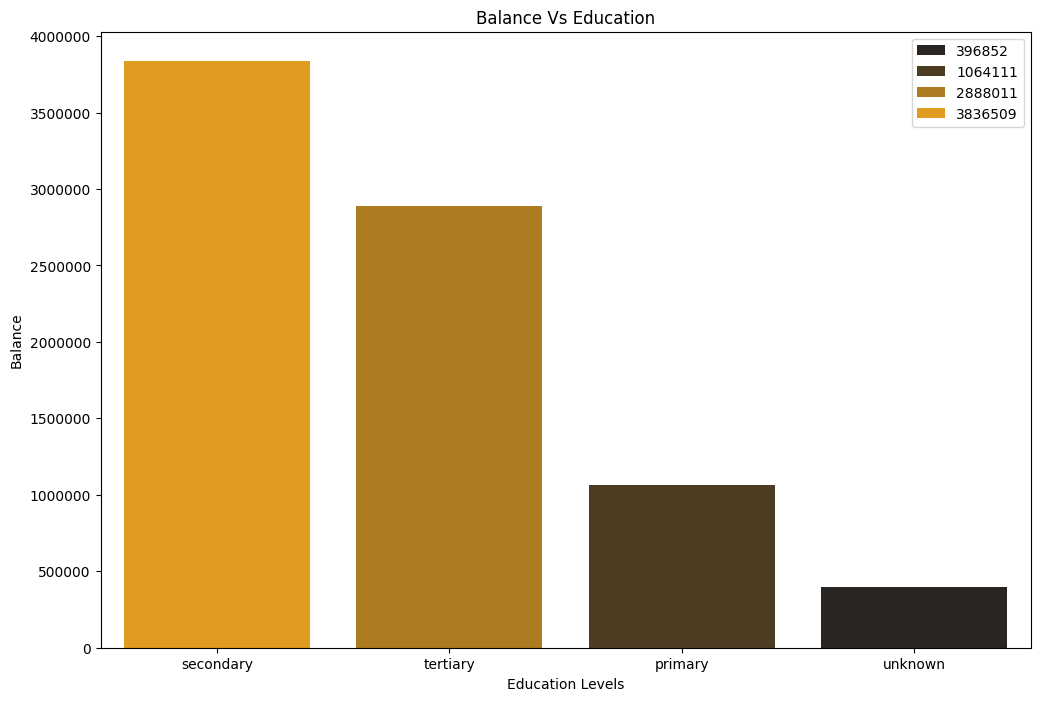

In [55]:
# Plotting the chart

plt.figure(figsize=(12,8))

sns.barplot(x=education_health.index,y=education_health.values,hue=education_health.values,color="orange")
plt.title("Balance Vs Education")
plt.xlabel("Education Levels")
plt.ylabel("Balance")
plt.ticklabel_format(style="plain",axis="y")
plt.show()

In [56]:
# Final Look at the cleaned Dataset

df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,no,2343,yes,no,yes
1,56,admin.,married,secondary,no,45,no,no,yes
2,41,technician,married,secondary,no,1270,yes,no,yes
3,55,services,married,secondary,no,2476,yes,no,yes
4,54,admin.,married,tertiary,no,184,no,no,yes


# Model Preparation and Execution

In [57]:
# Interested features

'''
Ages and balances were picked from the dataset because they most characterise the customers and the model will be traineed
and predictions cna be made based on customers that show similar characteristics in age and balance
'''

x = df_cleaned[["age","balance"]]

x

,age,balance
0,59,2343
1,56,45
2,41,1270
3,55,2476
4,54,184
...,...,...
11157,33,1
11158,39,733
11159,32,29
11160,43,0


In [58]:
# Scaling the data to normalize it

from sklearn.preprocessing import StandardScaler # Importing the library for scaling

scaler = StandardScaler()

x_scaled = x.copy()


x_scaled[["age","balance"]] = scaler.fit_transform(x[["age","balance"]]) # Scaling the dataset

In [59]:
x_scaled = x_scaled[["age","balance"]]

x_scaled.head() # Getting the first rows of the scaled data

,age,balance
0,1.542502,1.536588
1,1.286873,-0.766614
2,0.008726,0.461159
3,1.201663,1.669889
4,1.116453,-0.627299


# KMeans Clustering  Techhnique

- Firstly determining the optimal number of clusters required 

- Using the KMeans clustering model to cluster the customers based on the optimal   clustered identified

- This clustering technique will cluster customers based on common characteristics between them ( their age and baalnce ) 

In [60]:
# Importiing the important libraries

from sklearn.metrics import silhouette_score # For evaluuation
from sklearn.cluster import KMeans # For clustering


inertia = []
means = []


for i in range(2,11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit_predict(x_scaled)

    means.append(i)
    inertia.append(k_cluster.inertia_)

    print(i,silhouette_score(x_scaled,k_cluster.labels_)) # Checking the Silhuoette scores to determine the best number of cluster

2 0.45877402733560574
3 0.45730286590547875
4 0.4495845437540887
5 0.36628546457479133
6 0.3850582437916816
7 0.38269117162067384
8 0.3315701073689626
9 0.36858720197949646
10 0.34408931036153867


<function matplotlib.pyplot.show(close=None, block=None)>

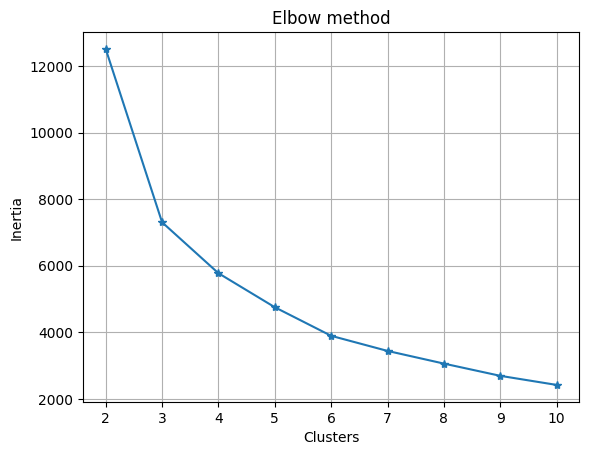

In [61]:
# Plotting th Elbow gragh to visualize the optimal cluster

plt.plot(means,inertia,marker = "*")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.grid(True)
plt.savefig("../Visuals/Elbow_method",dpi=300,bbox_inches="tight")

plt.show

From  the gragh showing where the Elbow curved,we can see that the optimal cluster is 3

3 is also the cluster that has the highest silhuoette score before decelerating

In [62]:
# Training the model based on the best cluster which is 3

k_means = KMeans(n_clusters=3,random_state=42)

k_means.fit(x_scaled)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [63]:
# Getting the labels and centroids

labels = k_means.predict(x_scaled)


centroids = k_means.cluster_centers_

labels

array([1, 2, 0, ..., 0, 0, 0], dtype=int32)

After model training and fitting...the result of the clusters are being appended into the original dataset to comapre and for further analysis

In [64]:
df_cleaned["Clusters"] = labels # New columns for the clusters

df_cleaned

C:\Users\DELL\AppData\Local\Temp\ipykernel_40244\3316923926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Clusters"] = labels # New columns for the clusters


,age,job,marital,education,default,balance,housing,loan,deposit,Clusters
0,59,admin.,married,secondary,no,2343,yes,no,yes,1
1,56,admin.,married,secondary,no,45,no,no,yes,2
2,41,technician,married,secondary,no,1270,yes,no,yes,0
3,55,services,married,secondary,no,2476,yes,no,yes,1
4,54,admin.,married,tertiary,no,184,no,no,yes,2
...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,no,0
11158,39,services,married,secondary,no,733,no,no,no,0
11159,32,technician,single,secondary,no,29,no,no,no,0
11160,43,technician,married,secondary,no,0,no,yes,no,0


# Model Visualization

This visual shows clustering visualization where by customers are grouped or clustered based on characteristics.

The different colours of the chart shows customers with different characteristics that shows financial abality

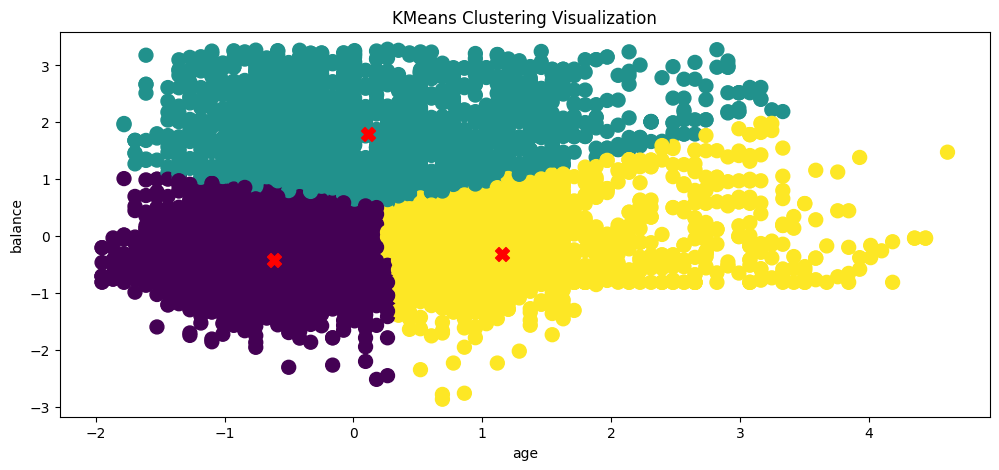

In [65]:
# Plotting the chart

plt.figure(figsize=(12,5))
plt.scatter(x_scaled.iloc[:,0],x_scaled.iloc[:,1],c=labels,cmap="viridis",s=100)
plt.scatter(centroids[:,0],centroids[:,1],c="red",marker="X",s=100)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.title("KMeans Clustering Visualization")
plt.savefig("../Visuals/Kmeans_clustering_visual",dpi=300,bbox_inches="tight")

plt.show()

In [66]:
# Importing PCA for dynamic clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


k_means_pca = KMeans(n_clusters=3,random_state=42)
labels_pca = k_means_pca.fit_predict(x_pca)
centroids_pca = k_means_pca.cluster_centers_

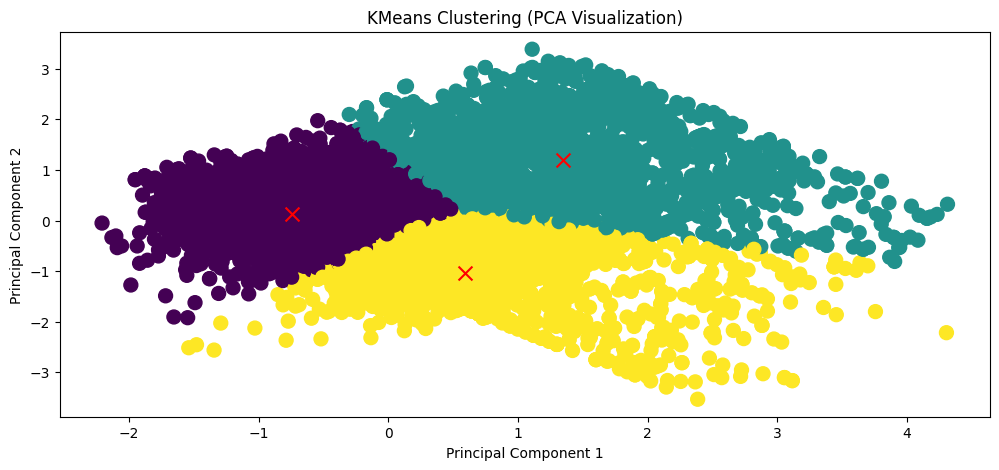

In [67]:
plt.figure(figsize=(12,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_pca,s=100,cmap="viridis")
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],c="red",marker="x",s=100)
plt.title("KMeans Clustering (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("../Visuals/PCA_visualization",dpi=300,bbox_inches="tight")

plt.show()

# Result Analysis

Further analysis was done on the customers to uncover trends and patterns

In [68]:
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,deposit,Clusters
0,59,admin.,married,secondary,no,2343,yes,no,yes,1
1,56,admin.,married,secondary,no,45,no,no,yes,2
2,41,technician,married,secondary,no,1270,yes,no,yes,0
3,55,services,married,secondary,no,2476,yes,no,yes,1
4,54,admin.,married,tertiary,no,184,no,no,yes,2


In [69]:
# Checking the value counts of the clusters

df_cleaned["Clusters"].value_counts()

Clusters
0    5525
2    2782
1    1800
Name: count, dtype: int64

In [70]:
# Checking the characteristics of the clusters based on balance

df_cleaned.groupby("Clusters")[["balance","age"]].mean()

,balance,age
Clusters,,
0,383.568869,33.648145
1,2600.578889,42.233889
2,497.923436,54.430266


In [71]:
# Categorizing custoomers based on their balance


'''
From the caharacteristics:

- Clusters with 0 are LOW EARNERS

- Clusters with 1 are HIGH EARNERS

- Clusters with 2 are MEDIUM EARNERS

'''


# Adding this feaature to the data

df_cleaned["Financial ablility"] = df_cleaned["Clusters"].map({0:"Low earners",1:"High earners",2:"Medium earners"})

df_cleaned

C:\Users\DELL\AppData\Local\Temp\ipykernel_40244\3186432893.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Financial ablility"] = df_cleaned["Clusters"].map({0:"Low earners",1:"High earners",2:"Medium earners"})


,age,job,marital,education,default,balance,housing,loan,deposit,Clusters,Financial ablility
0,59,admin.,married,secondary,no,2343,yes,no,yes,1,High earners
1,56,admin.,married,secondary,no,45,no,no,yes,2,Medium earners
2,41,technician,married,secondary,no,1270,yes,no,yes,0,Low earners
3,55,services,married,secondary,no,2476,yes,no,yes,1,High earners
4,54,admin.,married,tertiary,no,184,no,no,yes,2,Medium earners
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,no,0,Low earners
11158,39,services,married,secondary,no,733,no,no,no,0,Low earners
11159,32,technician,single,secondary,no,29,no,no,no,0,Low earners
11160,43,technician,married,secondary,no,0,no,yes,no,0,Low earners


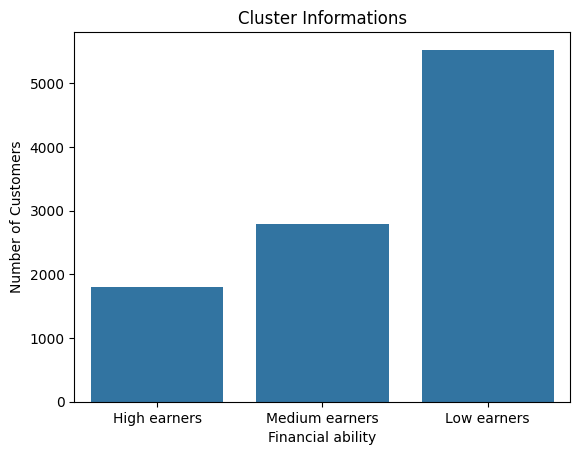

In [72]:
sns.countplot(x="Financial ablility",data=df_cleaned)
plt.title("Cluster Informations")
plt.xlabel("Financial ability")
plt.ylabel("Number of Customers")
plt.show()

In [73]:
# Looking at the mena age and balance

earning_cat = df_cleaned.groupby("Financial ablility")[["age","balance"]].mean()

In [74]:
earning_cat

,age,balance
Financial ablility,,
High earners,42.233889,2600.578889
Low earners,33.648145,383.568869
Medium earners,54.430266,497.923436


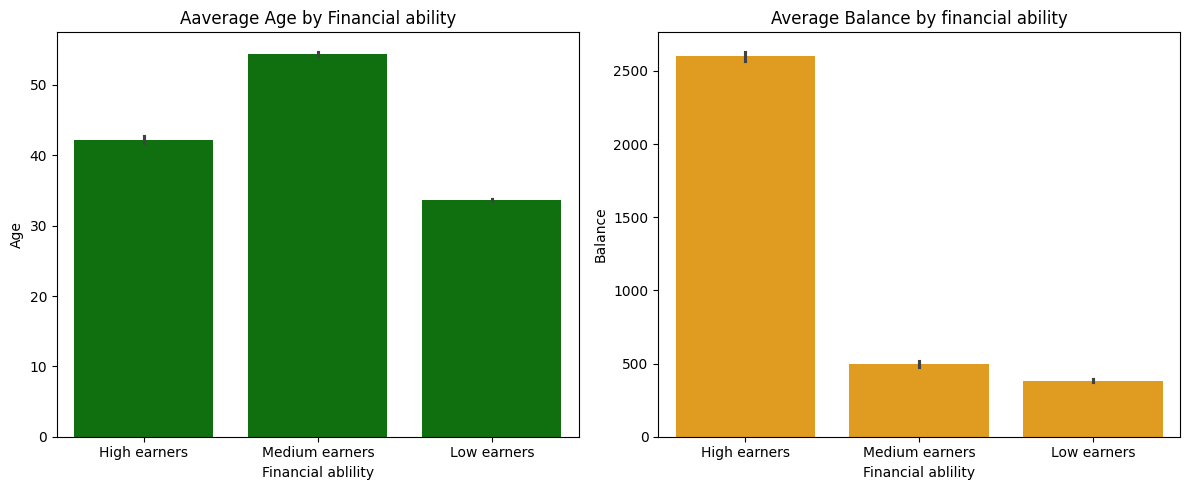

In [75]:
fig, axes = plt.subplots(1,2,figsize = (12,5))

sns.barplot(x="Financial ablility",y="age",data=df_cleaned,ax=axes[0],color="green")
axes[0].set_title("Aaverage Age by Financial ability")
axes[0].set_ylabel("Age")


sns.barplot(x="Financial ablility",y="balance",data=df_cleaned,ax=axes[1],color="orange")
axes[1].set_title("Average Balance by financial ability")
axes[1].set_ylabel("Balance")


plt.tight_layout()
fig.savefig("../Visuals/Cluster_analysis",dpi=300,bbox_inches="tight")

plt.show()

# Saving the Model

In [76]:
import pickle


filename = "Trained_model.pkl"
pickle.dump(k_means_pca,open(filename,"wb"))